In [1]:
#Location or Size: What Influences House Prices in Mexico?
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df= pd.read_excel(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\mexicocleanfinal.xlsx")

In [3]:
#Research Question 1
#Which state has the most expensive real estate market?

#Do housing prices vary by state? If so, which are the most expensive states for purchasing a home? During our exploratory data analysis, 
#we used descriptive statistics like mean and median to get an idea of the "typical" house price in Mexico.
#Now, we need to break that calculation down by state and visualize the results.

#We know in which state each house is located thanks to the "state" column. The next step is to divide our dataset into groups (one per state) 
#and calculate the mean house price for each group.

In [4]:
mean_price_by_state =df.groupby("state")["price_usd"].mean().sort_values(ascending=False)
mean_price_by_state

state
Chihuahua                          1.241004e+06
Durango                            1.041644e+06
Quintana Roo                       1.038832e+06
Guerrero                           1.000739e+06
Sonora                             9.711268e+05
Aguascalientes                     9.603334e+05
Jalisco                            9.574773e+05
Nayarit                            9.328594e+05
Tlaxcala                           9.176587e+05
Distrito Federal                   8.742992e+05
Querétaro                          8.658776e+05
Baja California Sur                8.189641e+05
Tamaulipas                         8.129851e+05
Puebla                             7.793765e+05
Estado de México                   7.684580e+05
Nuevo León                         7.604955e+05
Yucatán                            7.377351e+05
Hidalgo                            6.236376e+05
Morelos                            5.985588e+05
San Luis Potosí                    5.774331e+05
Veracruz de Ignacio de la Llave   

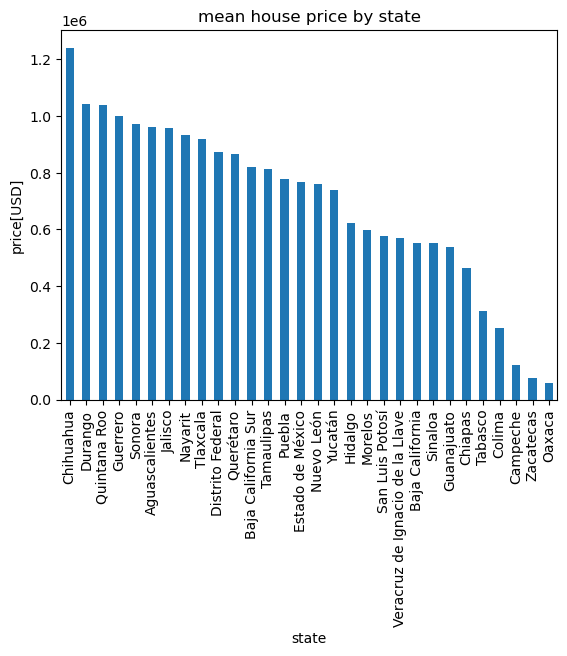

In [5]:
mean_price_by_state.plot(
    kind="bar",
    xlabel="state",
    ylabel="price[USD]",
    title="mean house price by state");

In [6]:
#It seems odd that Chihuahua would be the most expensive real estate market in Mexico when, according to recent GDP numbers, 
#it's not in the top 10 state economies. With all the variations in house sizes across states, a better metric to look at would be price per m2. In order to do that, 
#we need to create a new column.

#Create a new column in df called "price_per_m2". This should be the price for each house divided by it's size.

In [7]:
df["price_per_m2"] =df["price_usd"]/ df["area_m2"]
df.head(10)

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
0,1,house,Estado de México,19.560181,-99.233528,150,67965.56,453.103733
1,2,house,Nuevo León,25.688436,-100.198807,186,63223.78,339.912796
2,3,apartment,Guerrero,16.767704,-99.764383,82,84298.37,1028.028902
3,4,apartment,Guerrero,16.829782,-99.911012,150,94308.80,628.725333
4,6,house,Yucatán,21.052583,-89.538639,205,105191.37,513.128634
5,7,house,Querétaro,20.716315,-100.452503,320,274034.68,856.358375
6,10,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
7,11,house,Chiapas,16.769737,-93.088928,140,79029.72,564.498000
8,12,house,Estado de México,19.305407,-99.646948,235,115937.75,493.352128
9,13,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188


In [8]:
#First, use the groupby method to create a Series where the index contains each state in the dataset and
#the values correspond to the mean house price per m2 for that state. 
#Then use the Series to create a bar chart of your results. Make sure the states are sorted from the highest to lowest mean, 
##that you label the x-axis as "State" and the y-axis as "Mean Price per M^2[USD]", 
#and give the chart the title "Mean House Price per M^2 by State".

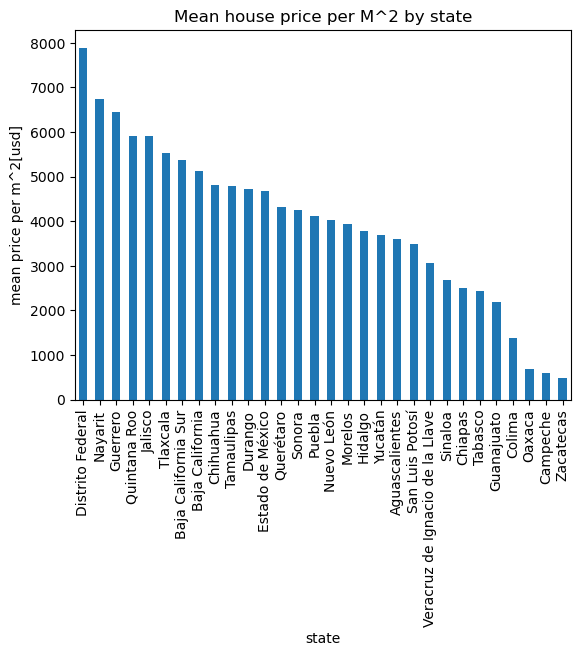

In [9]:
(df.groupby("state")
 ["price_per_m2"].mean()
 .sort_values(ascending=False)
  .plot(
       kind="bar",
       xlabel="state",
       ylabel="mean price per m^2[usd]",
       title="Mean house price per M^2 by state"
     )
);

In [10]:
#Now we see that the capital Mexico City (Distrito Federal) is by far the most expensive market. 
#Additionally, many of the top 10 states by GDP are also in the top 10 most expensive real estate markets.
#So it looks like this bar chart is a more accurate reflection of state real estate markets.

In [11]:
#Research Question 2
#Is there a relationship between home size and price?

#From our previous question, we know that the location of a home affects its price (especially if it's in Mexico City), 
#but what about home size? Does the size of a house influence price?

#A scatter plot can be helpful when evaluating the relationship between two columns because it lets you see if two variables are correlated — 
#in this case, if an increase in home size is associated with an increase in price.

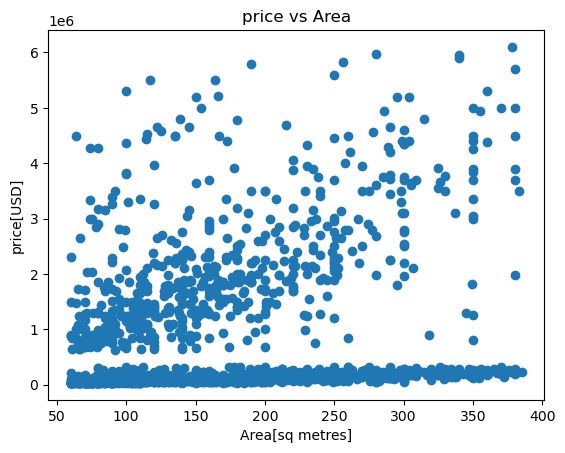

In [12]:
plt.scatter(x=df["area_m2"], y=df["price_usd"])
plt.xlabel("Area[sq metres]")
plt.ylabel("price[USD]")
plt.title("price vs Area");

In [13]:
#Using the corr method, calculate the Pearson correlation coefficient for "area_m2" and "price_usd"

In [15]:
p_correlation =df["area_m2"].corr(df["price_usd"])
print(p_correlation)

0.20636099608955524


In [16]:
#The correlation coefficient is over 0.3, so there's a poor relationship house size and price in Mexico. 
#But does this relationship hold true in every state? Let's look at a couple of states, starting with Morelos.

In [17]:
df_morelos = df[df["state"]=="Morelos"]

In [18]:
df_morelos.head()

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
6,10,house,Morelos,18.812605,-98.954826,281,151509.56,539.179929
9,13,house,Morelos,18.804197,-98.932816,117,63223.78,540.374188
18,22,house,Morelos,18.855343,-99.241142,73,36775.16,503.769315
49,61,house,Morelos,18.804197,-98.932816,130,65858.10,506.600769
55,67,house,Morelos,18.960244,-99.212962,305,227351.46,745.414623


In [19]:
#Using df_morelos, create a scatter plot that shows price vs area. Make sure to use the same axis labels as your last scatter plot. 
#The title should be "Morelos: Price vs. Area".

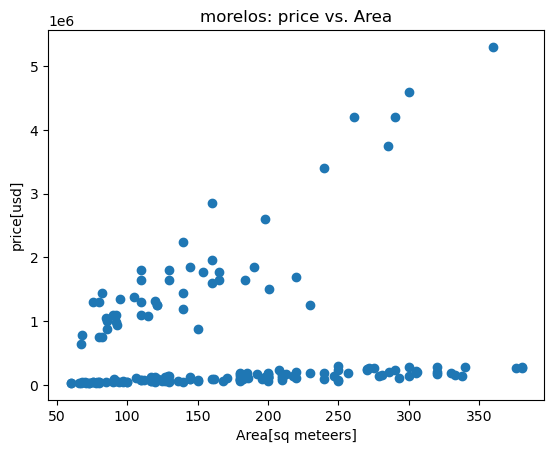

In [20]:
plt.scatter(x=df_morelos["area_m2"], y=df_morelos["price_usd"])
plt.xlabel("Area[sq meteers]")
plt.ylabel("price[usd]")
plt.title("morelos: price vs. Area");

In [21]:
p_correlation=df_morelos["area_m2"].corr(df_morelos["price_usd"])
print(p_correlation)

0.1256216868913298


In [22]:
#With a correlation coefficient that low, we can say that there's  no strong relationship between house size and price in Morelos.

#To conclude, let's look at the capital Mexico City (Distrito Federal).#

0.15093310181761818


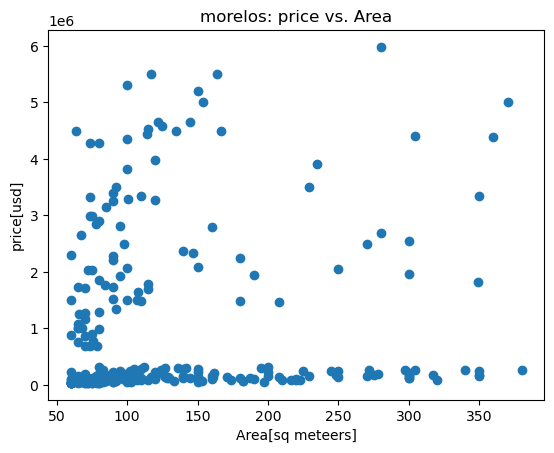

In [23]:
df_mexico_city =df[df["state"]== "Distrito Federal"]
#Print(df_mexico_city.head())



plt.scatter(x=df_mexico_city["area_m2"], y=df_mexico_city["price_usd"])
plt.xlabel("Area[sq meteers]")
plt.ylabel("price[usd]")
plt.title("morelos: price vs. Area");

p_correlation = df_mexico_city["area_m2"].corr(df_mexico_city["price_usd"])
print(p_correlation)

In [24]:
df_mexico_city.head(5)

,Unnamed: 0,property_type,state,lat,lon,area_m2,price_usd,price_per_m2
14,18,apartment,Distrito Federal,19.390748,-99.158695,127,131716.20,1037.135433
16,20,house,Distrito Federal,19.337652,-99.223327,297,264390.77,890.204613
20,24,apartment,Distrito Federal,19.403334,-99.157755,129,131716.20,1021.055814
21,25,apartment,Distrito Federal,19.428152,-99.106194,68,67175.26,987.871471
26,30,apartment,Distrito Federal,19.430141,-99.172536,97,104846.10,1080.887629


In [25]:
#Looking at the scatter plot and correlation coefficient, there's see a weak relationship between size and price. How should we interpret this?

#One interpretation is that the relationship we see between size and price in many states doesn't hold true in the country's biggest and most economically powerful urban center because there are other factors that have a larger influence on price. In fact, in the next project, we're going to look at another important Latin American city — Buenos Aires, Argentina — and build a model that predicts housing price by taking much more than size into account.